## Simulate non-cyanogenic evolution via drift alone

There is a finding that across a cline from less to more urban the frequency of a non-cyanogenic phenotype increases
The phenotype is genetically controlled by two loci, both of which have a segregating knock-out allele
If any individual is homozygous for either knockout they become non-cyanogenic

In this extremely simple simulation I create a 'population' which is represented by 2 lists of alleles (A/a and B/b)
To simulate evolution I randomly sample with replacement from the lists to create new list that represent the next generation.

By repeating this process with variable starting frequencies, population sizes and numbers of generations (functionally equivalent to steps in a strict stepping stone) we can look at the change in the frequency of cyanogenic and non-cyanogenic phenotypes


In [3]:
import random
from collections import OrderedDict

def sample_population(locus_A, locus_B, N):
    new_locus_A = [random.choice(locus_A) for _ in range(N)]
    new_locus_B = [random.choice(locus_B) for _ in range(N)]
    return new_locus_A, new_locus_B

def allele_freq(locus):
    p = sum(1*i.isupper() for i in locus)/float(len(locus))
    return p

# Given the frequency of A and the frequency of B, return the frequency of the 'acyanogenic' phenotype (i.e. recessive
# at either the A locus, B locus, or both) 
def phenotype(pA, pB):
    qA = 1-pA
    qB = 1-pB
    mut= qA**2 + qB**2 - (qA**2 * qB**2)
    WT = 1-mut
    return mut

# Randomly samples N alleles from locus A and locus B, calculates the frequency of both alleles followed by the frequency
# of 'acyanogenesis' phenotype and adds this frequency to step_dict list. Repeats process "step" times. Note that locus_A
# and locus_B are defined in the for loop. Therefore with each generation (i.e. step), loci are sampled from those sampled
# in the previous generation 
def cline(locus_A,locus_B, steps, N):
    step_dict = OrderedDict()
    for i in range(steps):
        #print i,
        locus_A, locus_B = (sample_population(locus_A,locus_B, N))
        pA, pB = allele_freq(locus_A), allele_freq(locus_B)
        #print pA, pB, phenotype(pA, pB)
        step_dict[i] = phenotype(pA, pB)
    return step_dict

In [58]:
# Initiate population with the following allele frequencies
pA = 0.5
pB = 0.5
qA = 1-pA
qB = 1-pB

# set the population size
N = 100
# Make the two lists based on the allele frequency to represent the initial population
locus_A = (['A'] * int(N*pA) ) + (['a'] * int(round(N*qA)) ) 
locus_B = (['B'] * int(N*pB) ) + (['b'] * int(round(N*qB)) ) 


####### sims simulations #####################
# We will simulate 'steps' iterations of resampling this population to simulate drift
# We will then repeat that simulation of 'steps' iterations 10000 times to get a mean
##############################################
sims = 1000
steps = 2
#this stores the results of each simulation for analysis
big_dict = OrderedDict()
for s in range(steps): big_dict[s] = []
for i in range(sims):
    # reset the population for each iteration. I don't actually think this is necessary
    locus_A = (['A'] * int(N*pA) ) + (['a'] * int(round(N*qA)) ) 
    locus_B = (['B'] * int(N*pB) ) + (['b'] * int(round(N*qB)) ) 
    # This is one simulation 
    step_dict = cline(locus_A,locus_B, steps, N)
    # Store the result of each step in dictionary to allow summary later
    for s in step_dict: big_dict[s].append(step_dict[s])

####
# now we have a dict
# with steps 1,2,3...25
# each step key corresponds to a list

0 0.53 0.54 0.38575756
OrderedDict([(0, 0.38575755999999994)])
1 0.53 0.47 0.43974919
OrderedDict([(0, 0.38575755999999994), (1, 0.43974919)])
0 0.47 0.53 0.43974919
OrderedDict([(0, 0.43974919)])
1 0.47 0.46 0.49058956
OrderedDict([(0, 0.43974919), (1, 0.49058956)])
0 0.56 0.5 0.3952
OrderedDict([(0, 0.3952)])
1 0.53 0.49 0.42354391
OrderedDict([(0, 0.3952), (1, 0.42354390999999997)])
0 0.53 0.47 0.43974919
OrderedDict([(0, 0.43974919)])
1 0.56 0.48 0.41165056
OrderedDict([(0, 0.43974919), (1, 0.41165056)])
0 0.45 0.52 0.463204
OrderedDict([(0, 0.46320400000000006)])
1 0.46 0.45 0.505891
OrderedDict([(0, 0.46320400000000006), (1, 0.5058910000000001)])
0 0.49 0.47 0.46793791
OrderedDict([(0, 0.46793791)])
1 0.53 0.43 0.47402959
OrderedDict([(0, 0.46793791), (1, 0.47402959000000006)])
0 0.43 0.44 0.53661136
OrderedDict([(0, 0.53661136)])
1 0.46 0.4 0.546624
OrderedDict([(0, 0.53661136), (1, 0.546624)])
0 0.55 0.56 0.356896
OrderedDict([(0, 0.35689599999999994)])
1 0.5 0.51 0.430075
Orde

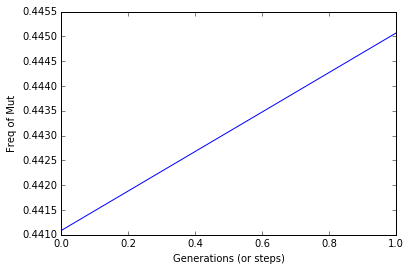

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

y = [sum(big_dict[s])/sims for s in big_dict.keys()]
x = big_dict.keys()

plt.plot(x,y)
plt.ylabel('Freq of Mut')
plt.xlabel('Generations (or steps)')
plt.show()

<function matplotlib.pyplot.show>

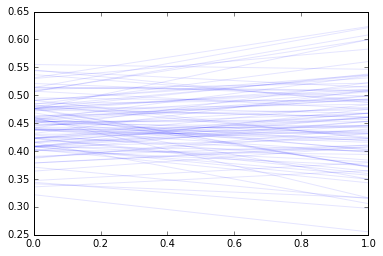

In [7]:
plt.figure(1)
plt.subplot(111)
for n in range(100):
    x = big_dict.keys()
    y = [big_dict[s][n] for s in big_dict]
    plt.plot(x, y, 'b-', alpha=0.1)


plt.show

In [56]:
step_dict

OrderedDict([(0, 0.4565777500000001), (1, 0.418144)])